In [5]:
#!pip install feather-format
import pyarrow.feather as feather
titanic_train = feather.read_feather('titanic_train.feather')
titanic_test = feather.read_feather('titanic_test.feather')

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2462 sha256=1fbdab6f5a5889d75757898302a501e507371dfc93d675915ee250fc50db13ec
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\7b\83\4b\44aa8f2292c0ae17a550c5105454e974fc45a5b2a522d66ae1
Successfully built feather-format


In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from numpy import argmax
import pandas as pd
import pickle

aplicaremos los siguientes modelos
* TSNE
* K-means
* Linear Regression
* Logistic Regression 
* Random Forest
* Boosted Forest
* PCA
* KNN classifier
* Support Vector Machine

Para optimizar los hiperparametros utilizaremos grid search

Manual de supervivencia
1. Escoje un modelo
1. Escoje los hiper-parámetros del modelo
1. Prepara el dataset en features matrix y el vector target
1. Divide el dataset en train y test
1. Aplica el algoritmo a tus datos de entrenamiento
1. Aplica el algoritmo a tus datos de prueba
1. Evalúa el modelo
1. Aplica el modelo en nuevos datos

In [7]:
# preparamos nuestro dataset en featura matrix y vector target
y_data = titanic_train["Transported"]
X_data = titanic_train.drop("Transported", axis=1)

In [8]:
# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)
# creamos dummy variables 
dummies_deck=pd.get_dummies(X_train['deck'],drop_first=True)
dummies_destination=pd.get_dummies(X_train['Destination'],drop_first=True)
dummies_home=pd.get_dummies(X_train['HomePlanet'],drop_first=True)
X_train_lr = X_train.drop(["lname", "fname", "Destination", "HomePlanet", "deck", "side"],axis=1)
X_train_lr=pd.DataFrame(X_train_lr)
X_train_lr=pd.concat([X_train_lr,dummies_deck ,dummies_destination,dummies_home], axis=1)
X_train=X_train_lr
dummies_deck=pd.get_dummies(X_test['deck'],drop_first=True)
dummies_destination=pd.get_dummies(X_test['Destination'],drop_first=True)
dummies_home=pd.get_dummies(X_test['HomePlanet'],drop_first=True)
X_test=X_test.drop(["lname", "fname", "Destination", "HomePlanet", "deck", "side"],axis=1)
X_train_lr=pd.concat([X_test,dummies_deck ,dummies_destination,dummies_home], axis=1)
X_test=X_train_lr

In [23]:
make_s_curve(n_samples=6519)

(array([[ 0.86172931,  1.49320914,  1.5073683 ],
        [ 0.56032346,  0.97904212,  1.82827388],
        [ 0.75158622,  1.41772806, -1.65963486],
        ...,
        [-0.91469737,  0.25840681,  1.40413948],
        [ 0.4466195 ,  1.48517417, -1.89472399],
        [-0.85058787,  0.03734445, -1.52583293]]),
 array([-4.18026092, -3.73636892,  2.29112916, ..., -1.98683419,
         2.67860916,  4.15869492]))

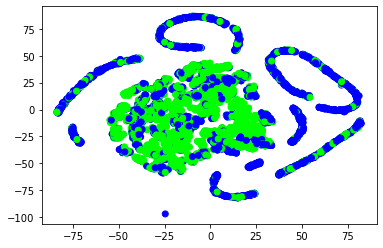

In [24]:
from sklearn.datasets import make_s_curve

color = [[0,0,1] if x else [0,1,0] for x in y_train]

tsne = TSNE()

X_tsne = tsne.fit_transform(X_train)

plt.close()
plt.scatter(X_tsne[:,0], X_tsne[:,1] ,c=color,cmap=plt.cm.Spectral)

plt.savefig('s-figure-tsne.png')

In [6]:
#Logistic Regression
model=LogisticRegression()
parameters = {'penalty':['none','l1','l2','elasticnet'],
                    'dual':[True,False],
                    'C':[0.001,0.01,0.1,1,1.5],
                    'fit_intercept':[True,False],
                    'intercept_scaling':[0.001,0.01,0.1,1,1.5],
                    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
                   },

grid = GridSearchCV(model, parameters, cv = 5, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.602, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.662, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.768, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.722, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.696, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, du

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sk

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.709, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.687, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.590, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.613, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.00

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.567, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.701, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.669, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=T

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, interc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of p

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=Tru

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.669, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.642, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.646, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.678, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.0

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=saga, score=n

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.711, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.528, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.577, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.527, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_inter

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan,

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.649, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.542, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.738, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.545, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.674, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.572, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.705, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.712, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.669, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, du

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.657, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.602, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.724, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.702, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.00

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_inte

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.777, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.708, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.672, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1, penalty=elasticn

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.725, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.664, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.758, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.548, total=   0.1s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.00

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga 
[CV]  C=0.001, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=ela

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.5s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solve

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.800, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.805, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.820, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=l

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_inte

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.777, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.800, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.805, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.808, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.793, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.820, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.809, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.838, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.816, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=Tr

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=libli

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.800, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.805, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.793, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.820, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.809, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.839, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=libline

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=0.1, penal

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.953, total=   0.5s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.936, total=   0.5s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.800, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.805, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.837, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.805, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.793, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.820, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.809, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.835, total

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.87

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.800, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.805, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.808, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.793, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.820, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.805, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.813, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.836, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=libline

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=True, inte

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penal

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.777, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.800, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, pena

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.817, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.838, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.816, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, 

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solve

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.777, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.800, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.817, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.819, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=l

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_inte

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=li

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.800, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.817, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.819, total=   0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.838, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.816, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=Fa

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.874, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.777, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.800, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.83

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.819, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.814, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.838, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_s

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, sol

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, 

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, dual=False

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.777, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.800, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.814, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.817, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.807, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.840, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.819, total=   0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.808, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.838, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.816, total=   0.1s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.001, dual=False, fit_intercept=False, intercept_scaling=1

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.554, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.512, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.729, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.702, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p


[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.01, dual=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.661, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.576, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.745, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.638, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=Tr

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] 

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.561, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.583, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.683, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.552, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_i

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, pena

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.529, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.522, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.543, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.618, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, int

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, interce

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.700, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.631, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.479, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c


[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solv

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan,

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.533, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.676, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.568, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.517, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[C

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.716, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.708, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.638, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.732, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_interc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.723, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.683, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.537, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.539, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=Tr

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=saga 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet,

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.620, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.537, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.679, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.706, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.739, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, interce

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01,

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.533, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.710, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.704, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.524, total=   0.1s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=Tr

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.01, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, int

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.900, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.905, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.893, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.853, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.909, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solve

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=Tru

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.900, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.905, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.893, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.853, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.899, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.887, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.910, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.891, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, inter

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.946, total=   0.5s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.900, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.905, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.893, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.90

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.853, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.899, total=   0.1s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.910, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.886, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.910, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.893, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, tota

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.898, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, interce

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.900, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.905, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.893, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.908, total=   0.3s
[

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.853, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.898, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.912, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.891, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.913, total=   0.1s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1, penalty=

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.946, total=   0.5s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.953, total=   0.5s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.936, total=   0.5s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.883, total=   0.1s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:


[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

 

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, sco

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.900, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.905, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.893, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.90

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.853, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.896, total=   0.1s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.891, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.910, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=True, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solve

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.899, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.911, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.888, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.844, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.906, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_inter

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.899, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.911, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.888, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.844, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.906, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solve

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=Fal

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.930, total=   0.4s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.843, total=   0.1s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solv

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=0.898, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=Fals

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.899, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.911, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.888, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.844, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.906, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=libline

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, inte

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.899, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.911, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.888, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.912, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.844, total=   0.1s
[CV] C=0.01, dual=False

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.906, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.892, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.87

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.899, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.911, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.888, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.844, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.900, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.888, total=   0.1s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.01, dual=False, fit_intercept=False, inte

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, f

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.706, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.773, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.717, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.664, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=Tru

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, in

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.564, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.725, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.709, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.546, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_in

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_s

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.674, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.536, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.685, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.741, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=T

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, so

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.588, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.551, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.665, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, du

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.610, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.660, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.749, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.616, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=T

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.574, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.725, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.702, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.758, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1,

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=True, fit_intercept=Fa

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, dual=True, f

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.776, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.551, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.549, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_interce

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sk

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.711, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.569, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.653, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.542, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_in

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=Fa

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.721, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.669, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.512, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.569, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, int

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.650, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.456, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.528, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.733, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.527, total=   0.1s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=True, fit_intercept=False,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.87

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.935, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.937, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.922, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.879, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.924, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.918, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, interc

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=0.939, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=0.923, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=Fal

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.935, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.937, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.922, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.94

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.842, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.879, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.922, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.926, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.908, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.927, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.915, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasti

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.935, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.937, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.922, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.946, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.842, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.879, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.924, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.926, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.911, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.936, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.916, t

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, sol

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1,

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.935, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.937, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.922, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=0.1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.842, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.879, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.928, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.926, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.919, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.938, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticne

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.935, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.937, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.922, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.946, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.879, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.849, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.936, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.923, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.940, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.926, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=True, intercept_scaling=1.5,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=non

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.923, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.927, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.909, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=new

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.876, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.921, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.908, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solve

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=Fals

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=0.939, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=liblinear, score=0.923, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1,

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.923, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.927, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.909, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.876, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.921, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.908, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=libline

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, inter

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.874, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.923, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.927, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.909, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.93

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.876, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.921, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.908, tota

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

 

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.923, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.927, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.909, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.937, total=   0.4s
[

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.876, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.921, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.908, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.913, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.874, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.923, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.927, total=   0.3s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.909, total=   0.4s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.93

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.876, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.921, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.925, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.908, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, dual=False, fit_intercept=False, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, i

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.687, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.687, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.768, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.775, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=Tru

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.674, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.620, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.688, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.746, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, interc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.630, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.543, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.749, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.725, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.509, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=0.1, penalt

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True


[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.713, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.562, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.531, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.740, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, 

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sk

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.543, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.521, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.715, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.668, total=   0.1s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=True, intercept_scali

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The scor

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercep

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.544, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.536, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.701, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.728, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_inte

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=saga 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=n

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.503, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.703, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.694, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.624, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.652, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=Fals

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.558, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.733, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.620, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.599, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, inter

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=el

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l1, solver

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.674, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.580, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.626, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.730, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1, pe

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, inter

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.581, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.662, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.548, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.664, total=   0.1s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, inter

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag 
[CV]  C=1, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=sag, score=nan, total=   0.

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.835, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.928, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, sol

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[C

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.835, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1, dual=F

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, d

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=F

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.835, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.928, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=False, fit

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, sco

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_int

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercep

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.835, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.937, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.946, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, i

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-c

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=Fals

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=F

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.933, total=   0.5s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.953, total=   0.5s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.884, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.835, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.936, total=   0.1s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.934, total=   0.1s
[CV] C=1, dual=False, fit

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticne

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.874, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.929, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.921, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.947, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.929, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.801, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.916, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.942, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.924, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scali

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.929, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.921, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.947, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.929, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.801, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=Fals

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.916, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.942, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.924, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, sol

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.929, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.921, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.947, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.929, total=   0.5s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.801, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.916, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.942, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.924, total=   0

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.930, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.929, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.921, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.947, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.929, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.801, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=False, fit_intercep

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.930, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, to

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.929, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.921, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.947, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.929, total=   0.4s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.801, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.933, total=   0.1s
[CV] C=1, dual=F

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, 

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.724, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.687, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.561, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.725, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=Tru

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn


[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.001, pen

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True,

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.590, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.692, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.762, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.583, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_in

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_s

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.719, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.566, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.699, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.541, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=T

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercep

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.601, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.662, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.741, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.545, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.569, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1, penalt

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=nan, total=   0.0s

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.600, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.574, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.696, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.702, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.597, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=True, intercept

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of p

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.671, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.544, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.561, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.751, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.603, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fi

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, dual=Tru

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.618, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.654, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.694, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.623, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\m

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.675, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_interce

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p


[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1.5, dual=True, fit_intercept=False, interc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.541, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.683, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.546, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.683, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.632, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False,

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, du

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.603, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.567, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.663, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.745, total=   0.2s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, int

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFa


[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, i

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.643, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.755, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.636, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.506, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-c

[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.760, total=   0.1s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=True, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=True, fit_intercept=False,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=liblinear, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.946, total=   0.5s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.933, total=   0.6s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.953, total=   0.6s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.936, total=   0.6s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.880, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.927, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.919, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.947, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=libline

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, interc

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.5s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.946, total=   0.6s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.953, total=   0.5s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.936, total=   0.5s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.883, total=   0.1s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=liblinear 
[CV]  C=1.5, d

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore th

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.880, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.931, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.933, total=   0.1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scal

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.855, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total= 

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.880, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=Fa

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms


[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.917, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.938, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=0.1, penalty=elasticnet, sol

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.946, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=Fa

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore 

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.946, total=   0.5s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.953, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.936, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.880, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.846, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.936, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.946, total=   0.1s
[CV] C=1.5, dual=False, f

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, sco

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.933, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.883, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.852, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.946, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.933, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.953, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.936, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.880, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, dual=Fa

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.945, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.931, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.953, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.936, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=True, intercept_scaling=1.5,

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.930, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=li

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=newton-

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.923, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.949, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.841, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=liblinear,

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.001, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.0

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=lbfgs, score=0.87

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=newton-cg, score

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.923, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.949, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.841, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=liblinear, score=0.932, tot

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.01, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, inter

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.948, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=lbfgs, score=0.874, total=

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_interc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.923, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.949, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.841, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=liblinear, score=0.916, tota

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=0.1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_sca

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.939, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.925, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[C

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.776, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.930, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.923, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.949, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.841, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.916, total=   0.1s
[CV] C=1

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1, penalty=elasticnet, solver=newto

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.939, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.925, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.948, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=newton-cg, score=0.932, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.771, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.788, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=lbfgs, score=0.843, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=liblinear, sco

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore 

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=none, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=newton-cg, score=nan, tot

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.769, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.799, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l1, solver=saga, score=0.782, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.930, total=   0.3s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.923, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.949, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg 


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=newton-cg, score=0.932, total=   0.4s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.768, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.841, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=lbfgs, score=0.873, total=   0.1s
[CV] C=1.5

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.929, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.932, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.916, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score=0.946, total=   0.1s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=liblinear, score

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.775, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.783, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.801, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=sag, score=0.779, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.776, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.769, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.799, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=l2, solver=saga, score=0.782, total=   0.2s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg 
[CV]  C=1.5, dual=False, fit_intercept=False, intercept_scaling=1.5, penalty=elasticnet, solver=newton-cg, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these param

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=({'C': [0.001, 0.01, 0.1, 1, 1.5],
                          'dual': [True, False], 'fit_intercept': [True, False],
                          'intercept_scaling': [0.001, 0.01, 0.1, 1, 1.5],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'libl

In [7]:
params, scores = [], [] 
params.append(grid.best_params_)
scores.append(grid.best_score_)

In [8]:
#KNN
model=KNeighborsClassifier()
parameters = {'n_neighbors':[2,5,10,12,15],
                    'weights':['uniform','distance'],
                    'algorithm':['auto','ball_tree','kd_tree'],
                    'leaf_size':[20,30,40],
                    'p':[1,2]
                   },

grid = GridSearchCV(model, parameters, cv = 5, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform, score=0.691, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform, score=0.709, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform, score=0.708, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform, score=0.710, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=uniform, score=0.711, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance, score=0.708, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance, score=0.701, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, n_neighbors=2, p=1, weights=distance, score=0.722, total=   0.1s
[CV] algorithm=auto, leaf_size=20,

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=({'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'leaf_size': [20, 30, 40],
                          'n_neighbors': [2, 5, 10, 12, 15], 'p': [1, 2],
                          'weights': ['uniform', 'distance']},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [9]:
params.append(grid.best_params_)
scores.append(grid.best_score_)

In [10]:
#Random Forest
parameters = {'n_estimators':[1,10,100, 1000], 'criterion': ['gini', 'entropy', 'log_loss']}
model = RandomForestClassifier()
model.fit(X_train, y_train)
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
D:\Anaconda\lib\

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [11]:
params.append(grid.best_params_)
scores.append(grid.best_score_)

In [12]:
# Boosted forest
parameters = {'n_estimators':[1,10,100], 'loss': ['deviance', 'exponential', 'log_loss'], 'learning_rate':[0.1,1,5]}
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'log_loss' not supported. 

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'log_loss' not supported. 

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'log_loss' not supported. 

  FitFailedWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan.

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [13]:
params.append(grid.best_params_)
scores.append(grid.best_score_)

In [14]:
#Support Vector Machine
parameters = {'C':[0.5,1,2], 'kernel':['rbf','sigmoid'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}

model = SVC()
model.fit(X_train, y_train)
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 2],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
params.append(grid.best_params_)
scores.append(grid.best_score_)

In [16]:
names=["Logistic Regression", "KNN", "Random Forest", "Boosted Forest","SVM"]

In [17]:
for model, param, score in zip (names, params, scores):
    print(model, param, score, '\n')

Logistic Regression {'C': 1, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l1', 'solver': 'liblinear'} 0.9414012731356143 

KNN {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'} 0.7861632429174769 

Random Forest {'criterion': 'entropy', 'n_estimators': 1000} 0.9610374124836973 

Boosted Forest {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100} 0.9553616241895767 

SVM {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'} 0.7923000955793379 



In [18]:
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, thr = metrics.roc_curve(labels, predictions)
    return fpr, tpr, thr

def test_conf(model, data, labels, thr):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    mat = metrics.confusion_matrix(labels, predictions>=thr)
    return mat

In [19]:
classifiers=[LogisticRegression(C=1.5,intercept_scaling=0.1,penalty='l1',solver='liblinear'),
             KNeighborsClassifier(n_neighbors=15,algorithm='ball_tree',leaf_size=20,p=1),
             RandomForestClassifier(criterion='entropy',n_estimators=1000),
             GradientBoostingClassifier(learning_rate=1,loss='exponential'),
             SVC(C=2,decision_function_shape='ovo')]

for model in classifiers:
    model.fit(X_train, y_train)

Logistic Regression AUC:0.9861943055636669
Logistic Regression Best Threshold=0.416345
[[1018   59]
 [  60 1037]]

KNN AUC:0.8378670959627379
KNN Best Threshold=0.466667
[[736 341]
 [126 971]]

Random Forest AUC:0.9946481879761551
Random Forest Best Threshold=0.480000
[[1027   50]
 [  26 1071]]

Boosted Forest AUC:0.9922308583636132
Boosted Forest Best Threshold=-0.100931
[[1025   52]
 [  36 1061]]

SVM AUC:0.8441626483640281
SVM Best Threshold=0.364404
[[802 275]
 [159 938]]



Text(0, 0.5, 'True Positive Rate')

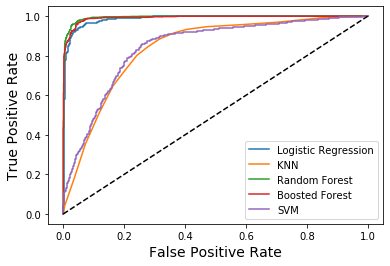

In [20]:
for name, model in zip(names, classifiers):
    fpr, tpr, thr = test_roc(model, X_test, y_test)
    plt.plot(fpr, tpr, label=name)
    print(name+' AUC:{}'.format(metrics.auc(fpr, tpr)))
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thr[ix]
    print(name+' Best Threshold=%f' % (best_thresh))
    mat = test_conf(model, X_test, y_test, best_thresh)
    print(mat)
    print()
    
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

In [21]:
#Ajustamos el mejor modelo (Random Forest)
modelo_def=RandomForestClassifier(criterion='entropy',n_estimators=1000)
dummies_deck=pd.get_dummies(X_data['deck'],drop_first=True)
dummies_destination=pd.get_dummies(X_data['Destination'],drop_first=True)
dummies_home=pd.get_dummies(X_data['HomePlanet'],drop_first=True)
X_data=X_data.drop(["lname", "fname", "Destination", "HomePlanet", "deck", "side"],axis=1)
modelo_def.fit(X_data,y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#Damos el formato a nuestro archivo test y calculamos el vector de probabilidades
dummies_deck=pd.get_dummies(titanic_test['deck'],drop_first=True)
dummies_destination=pd.get_dummies(titanic_test['Destination'],drop_first=True)
dummies_home=pd.get_dummies(titanic_test['HomePlanet'],drop_first=True)
titanic_test=titanic_test.drop(["lname", "fname", "Destination", "HomePlanet", "deck", "side"],axis=1)
predicciones=modelo_def.predict_proba(titanic_test)[:,1]

In [23]:
#Transformamos el vector de probabilidades en booleano y lo pegamos al dataframe original de test
predicciones=(predicciones>=0.5)
test_con_pred=feather.read_feather('titanic_test.feather')
test_con_pred["Transported"]=predicciones
test_con_pred.to_csv('titanic_test_con_predicciones.csv')

In [24]:
pickle.dump(modelo_def, open('modelo_def.sav', 'wb'))
